# Защита персональных данных клиентов

Нужно защитить данные клиентов страховой компании «Хоть потоп». Необходимо найти такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Требуется обосновать корректность его работы.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

## Загрузка данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


In [2]:
data = pd.read_csv('/datasets/insurance.csv')

In [3]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Пропусков нет, значения адекватные. Данные не требуют дополнительной обработки.

Взглянем на зависимость признаков друг от друга

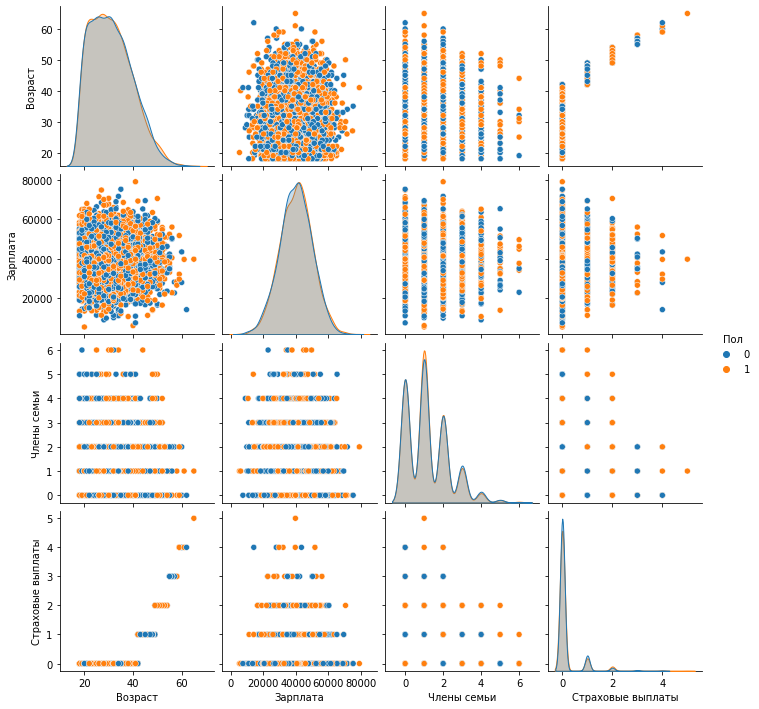

In [6]:
sns.pairplot(data, hue='Пол')

Видна мультиколлинеарность, т.е. сильная зависимость между возрастом и количеством страховых выплат.  
При обучении модели один из этих признаков лучше исключить.

  **Вывод**  
  
  В данных нет проблем:  
* Отсутствуют пропуска  
* Отсутствуют выбросы
* У всех колонок правильный тип  
* Все значения адекватны  

Если после обучения метрики покажут неудовлетворительный результат, есть смысл попробовать исключить возраст из признаков.

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Умножим матрицу признаков $X$ на обратимую матрицу $P$, подставим её в формулу обучения $w=(X^T X)^{-1} X^T y$  и попробуем упростить это выражение:

$$
w_p = ((XP)^T(XP))^{-1} (XP)^Ty = (P^TX^TXP)^{-1} P^TX^Ty = (P^T(X^TXP))^{-1} P^TX^Ty = (X^TXP)^{-1}(P^T)^{-1} P^TX^Ty =  
((X^TX)P)^{-1}X^Ty = P^{-1}(X^TX)^{-1}X^Ty = P^{-1}w
$$

Подставим новый вектор весов $w_p$ в формулу вычисления предсказания:

$$
a = XPw_p = XPP^{-1}w = XEw = Xw
$$

Таким образом, при умножении матрицы признаков на обратимую матрицу вектор предсказаний не изменится. Отсюда следует, что качество модели тоже не изменится.

## Алгоритм преобразования

**Алгоритм**

Умножить датафрейм с признаками на обратимую матрицу $P$  (матрица-преобразователь)  

**Обоснование**

При умножении матрицы на обратимую матрицу качество линейной регрессии не изменяется, это доказано в предыдущем разделе

## Проверка алгоритма

In [7]:
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']

Оценим качество модели до преобразований:

In [8]:
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
print(f"R2-метрика равна {r2_score(target, predictions):.2f}%")

R2-метрика равна 0.42%


Преобразуем данные и оценим качество модели:

In [9]:
# матрица-преобразователь
P = np.random.rand(features.shape[1],features.shape[1]) 

features = data.drop('Страховые выплаты', axis=1)
features = features @ P
target = data['Страховые выплаты']

In [10]:
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
print(f"R2-метрика равна {r2_score(target, predictions):.2f}%")

R2-метрика равна 0.42%


**Вывод**  
Метрики качества модели до и после преобразования признаков равны. Удалось найти метод преобразования данных для защиты информации клиентов.